En este notebook vamos a analizar la influencia de un tratamiento alternativo para el alivio del dolor de espalda. Para más información puede leer el archivo README. Los datos se encuentran disponibles en este carpeta bajo el nombre data.csv.

**In this notebook, we are going to analyze the influence of an alternative treatment for the relief of back pain. For more information, you can read the README file. The data is available in this folder under the name data.csv.**

# Import libraries:
In this case, I am going to use two libraries (pingouin and missingno) for the inferential analysis that I don't have installed. The reason why I will install them previously. If you have them, you can just jump to the import section.

In [1]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt

import seaborn as sns 

import plotly.express as px 

import numpy as np

import pandas as pd

import math

from scipy import stats

import pingouin as pg

import missingno as msno

# Import and read data:

In [4]:
file = "C:/Users/maric/Documents/Python Scripts/Python Back Pain Treatment Analysis/data.csv"
file

'C:/Users/maric/Documents/Python Scripts/Python Back Pain Treatment Analysis/data.csv'

In [5]:
data = pd.read_csv(file,sep=";",header=0)
data.head()

,Id Paciente,Sexo,Edad,Peso,Altura,LC,PC,NHD,ODI Mes0,ODI Mes1,Grupo,Grupos
0,1,0,44,64.50,1.63,0,0,0,44.3,35.2,0,Convencional
1,2,0,33,67.52,2.02,0,0,0,38.9,29.4,0,Convencional
2,3,0,47,72.72,1.60,0,0,0,39.3,31.7,0,Convencional
3,4,0,34,71.83,1.85,0,0,0,33.4,23.6,0,Convencional
4,5,0,41,52.08,1.67,0,0,0,42.7,34.6,0,Convencional


# Variables exploration:

<AxesSubplot:>

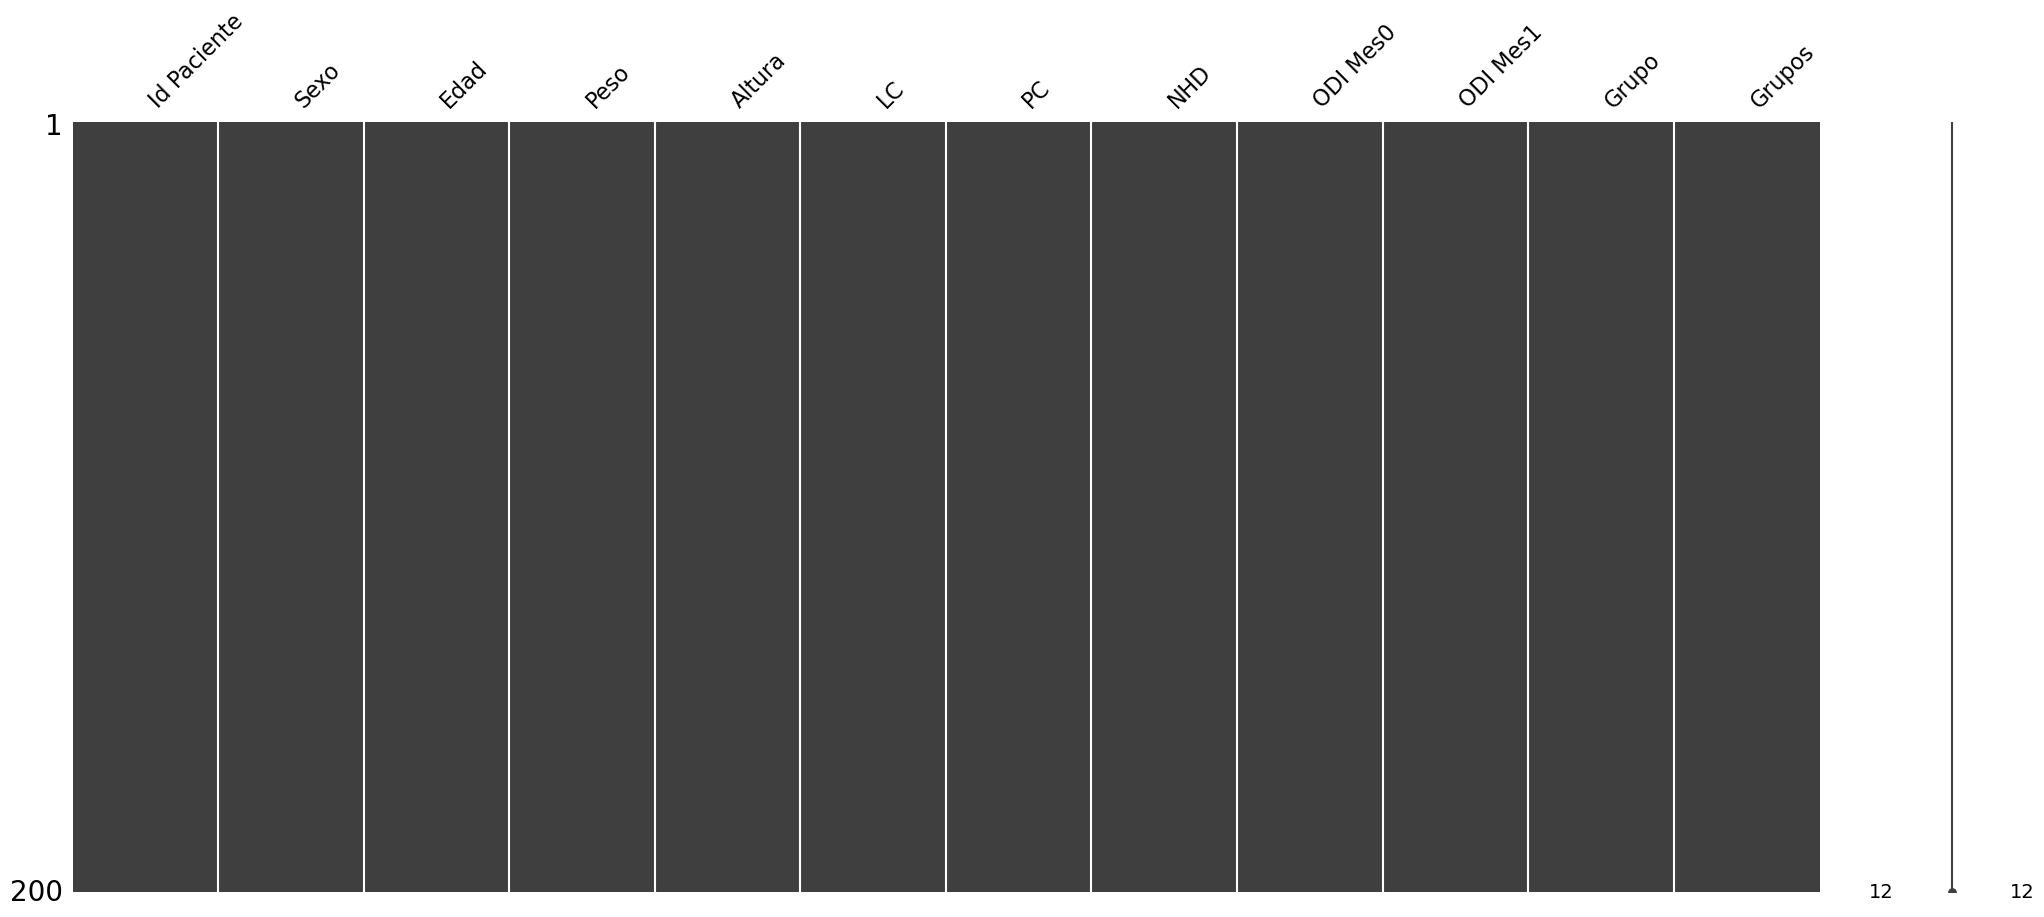

In [6]:
# We ensure that we don't have NAN values:

msno.matrix(data)

In [7]:
print ('Number of observations:')
len(data)

Number of observations:


200

In [8]:
print ('Number of variables:')
len(data.columns)

Number of variables:


12

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id Paciente  200 non-null    int64  
 1   Sexo         200 non-null    int64  
 2   Edad         200 non-null    int64  
 3   Peso         200 non-null    float64
 4   Altura       200 non-null    float64
 5   LC           200 non-null    int64  
 6   PC           200 non-null    int64  
 7   NHD          200 non-null    int64  
 8   ODI Mes0     200 non-null    float64
 9   ODI Mes1     200 non-null    float64
 10  Grupo        200 non-null    int64  
 11  Grupos       200 non-null    object 
dtypes: float64(4), int64(7), object(1)
memory usage: 18.9+ KB


# Response variable
We are going to use the differences in the Oswestry Disability Index (ODI) as response variable to evaluate the effect of the treatment. For that we are going to calculate: Diff_ODI = ODImes0 – ODImes1

In [12]:
data["diff_ODI"]=data["ODI Mes0"]-data["ODI Mes1"]
data.head()

,Id Paciente,Sexo,Edad,Peso,Altura,LC,PC,NHD,ODI Mes0,ODI Mes1,Grupo,Grupos,diff_ODI
0,1,0,44,64.50,1.63,0,0,0,44.3,35.2,0,Convencional,9.1
1,2,0,33,67.52,2.02,0,0,0,38.9,29.4,0,Convencional,9.5
2,3,0,47,72.72,1.60,0,0,0,39.3,31.7,0,Convencional,7.6
3,4,0,34,71.83,1.85,0,0,0,33.4,23.6,0,Convencional,9.8
4,5,0,41,52.08,1.67,0,0,0,42.7,34.6,0,Convencional,8.1


In [13]:
# Description of the response variable:
data["diff_ODI"].describe()

count    200.000000
mean      24.529500
std       14.305644
min        5.000000
25%        9.950000
50%       24.150000
75%       43.300000
max       45.000000
Name: diff_ODI, dtype: float64

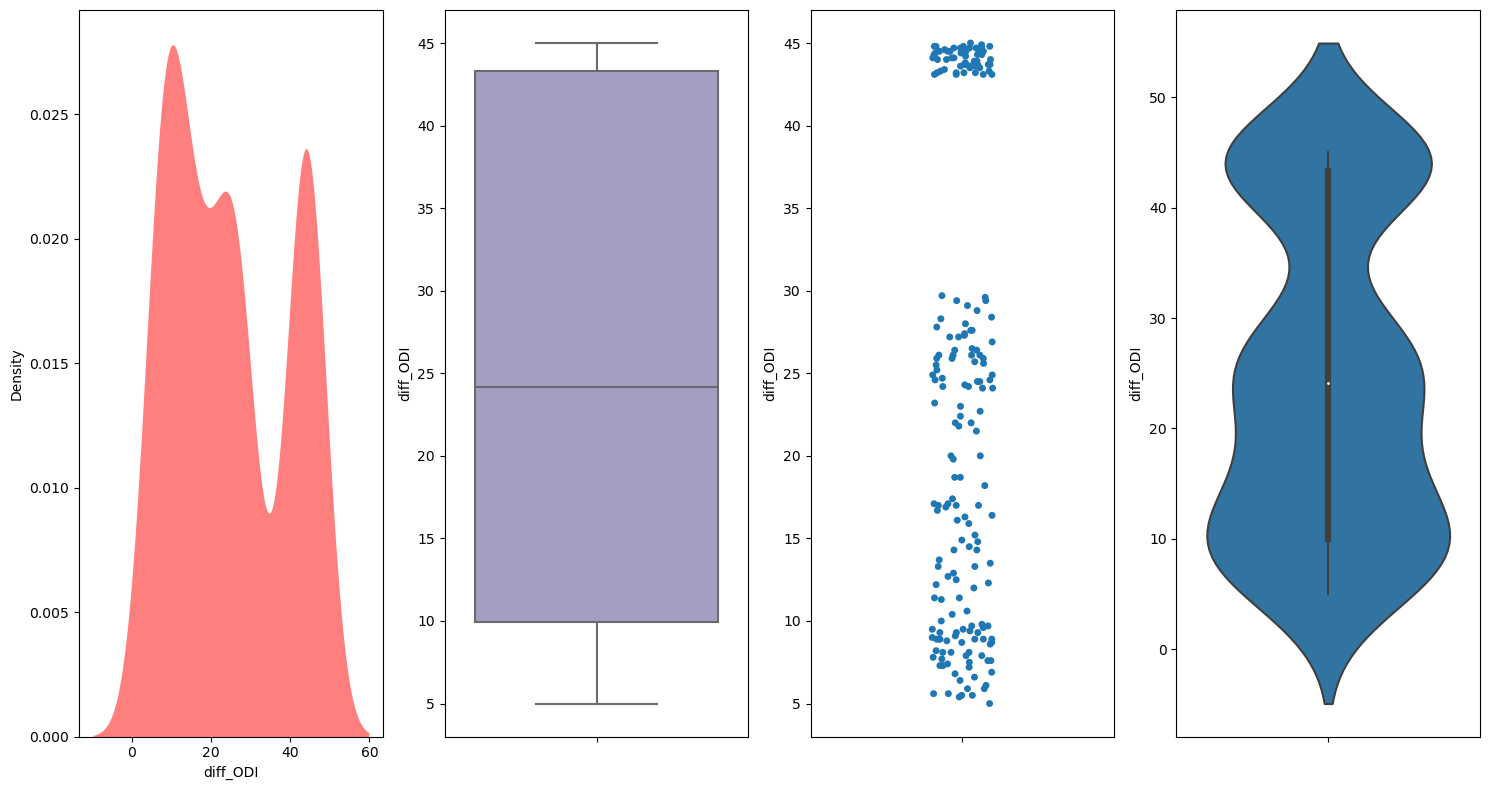

In [15]:
# General graphical representation of the response variable:

fig,axs = plt.subplots (ncols=4, figsize=(15,8))

sns.kdeplot(
    data=data, x ="diff_ODI", color= 'red',
    fill= True, common_norm=False,    
    alpha=.5, linewidth=0, ax=axs[0])

sns.boxplot(data=data, y="diff_ODI", palette="Purples", ax=axs[1])

sns.stripplot(y="diff_ODI", data=data, ax=axs[2])

sns.violinplot(data=data, y="diff_ODI",ax=axs[3])


fig.tight_layout()
plt.show()

## Evaluation considering treatment groups:

In [16]:
df = data.copy()

stats = df.groupby(['Grupo'])['diff_ODI'].agg(['mean','count','std'])
print (stats)
print('-'*30)

ci95_hi=[]
ci95_lo=[]


for i in stats.index:
    m,c,s = stats.loc[i]
    ci95_hi.append(m+1.96*s/math.sqrt(c))
    ci95_lo.append(m-1.96*s/math.sqrt(c))

stats['ci95_hi']=ci95_hi
stats['ci95_lo']=ci95_lo
print(stats)

            mean  count       std
Grupo                            
0      12.336634    101  5.430041
1      36.968687     99  8.715008
------------------------------
            mean  count       std    ci95_hi    ci95_lo
Grupo                                                  
0      12.336634    101  5.430041  13.395640  11.277627
1      36.968687     99  8.715008  38.685434  35.251940


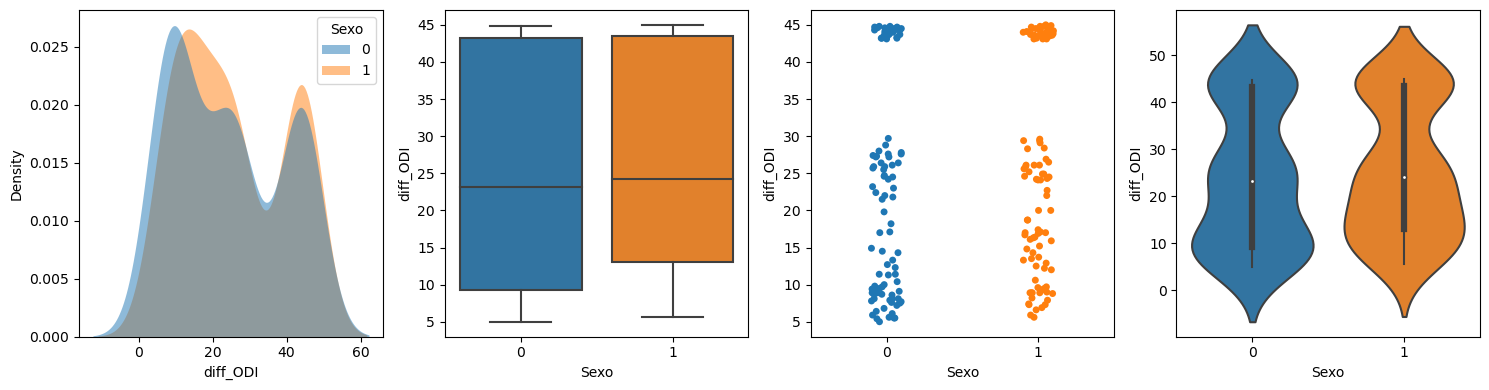

In [17]:
# Graphical representation:
fig,axs = plt.subplots (ncols=4, figsize=(15,4))
sns.kdeplot(
    data=data, x ="diff_ODI", hue="Sexo",
    fill= True, common_norm=False,    
    alpha=.5, linewidth=0, ax=axs[0])
sns.boxplot(data=data, y="diff_ODI", x="Sexo", ax=axs[1])
sns.stripplot(y="diff_ODI", data=data,x="Sexo", ax=axs[2])
sns.violinplot(data=data, y="diff_ODI", x="Sexo",ax=axs[3])
fig.tight_layout()
plt.show()

**Here we can begin to see that there are two groups in the distribution diagram, indicating a difference in diff according to a certain factor. Before moving forward in the inferential study on whether or not treatment is an influential variable, we are going to do a descriptive study to make sure that we do not miss any factor. To do this, we will represent the response variable based on the other variables from the patients.**

# Descriptive Analysis:

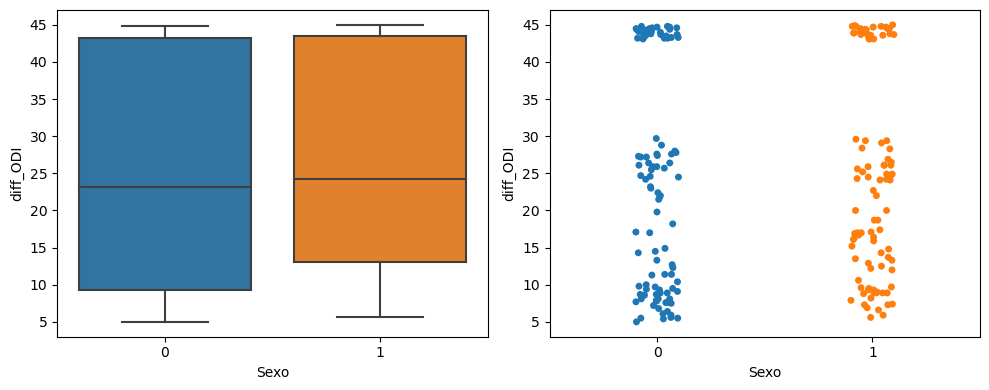

In [19]:
#According to the Sex:

fig,axs = plt.subplots (ncols=2, figsize=(10,4))
sns.boxplot(data=data, y="diff_ODI", x="Sexo", ax=axs[0])
sns.stripplot(y="diff_ODI", data=data,x="Sexo", ax=axs[1])
   
fig.tight_layout()
plt.show()

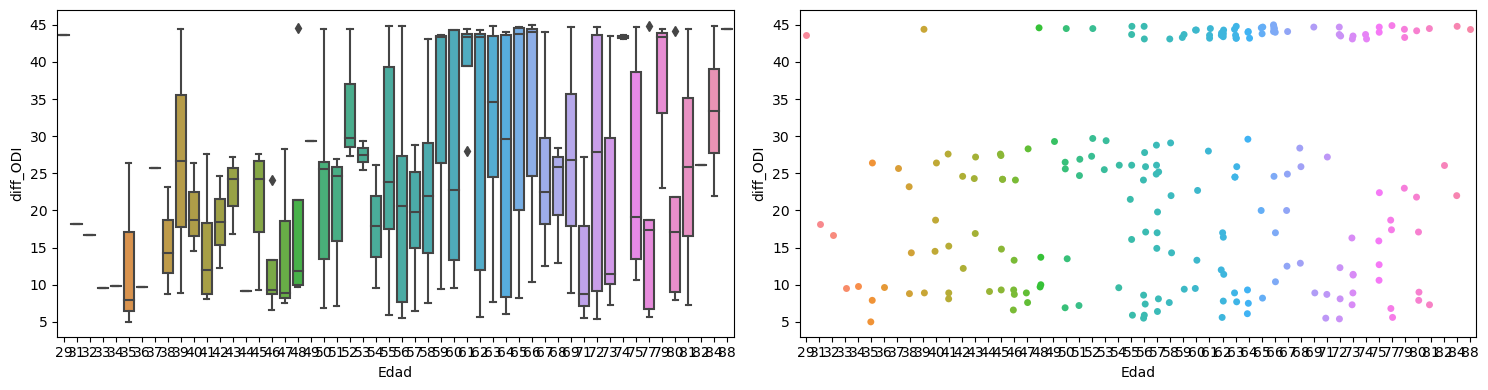

In [20]:
#According to the age:
fig,axs = plt.subplots (ncols=2, figsize=(15,4))
sns.boxplot(data=data, y="diff_ODI", x="Edad", ax=axs[0])
sns.stripplot(y="diff_ODI", data=data,x="Edad", ax=axs[1])
fig.tight_layout()
plt.show()

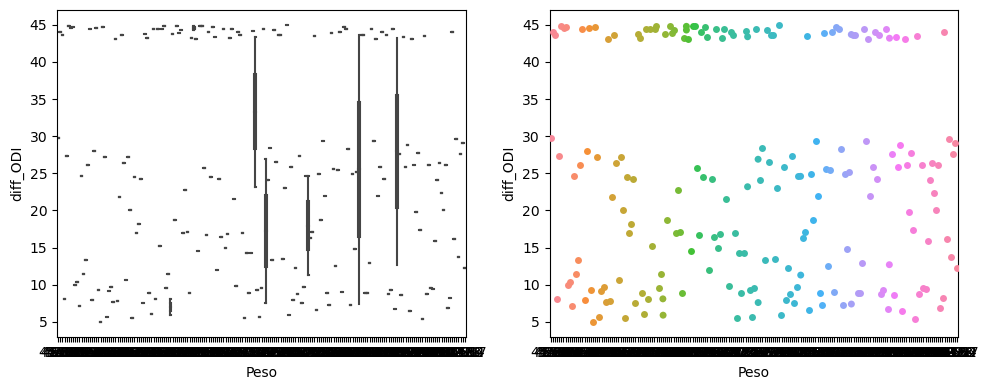

In [21]:
# According to the weight:
fig,axs = plt.subplots (ncols=2, figsize=(10,4))
sns.boxplot(data=data, y="diff_ODI", x="Peso", ax=axs[0])
sns.stripplot(y="diff_ODI", data=data,x="Peso", ax=axs[1])
fig.tight_layout()
plt.show()

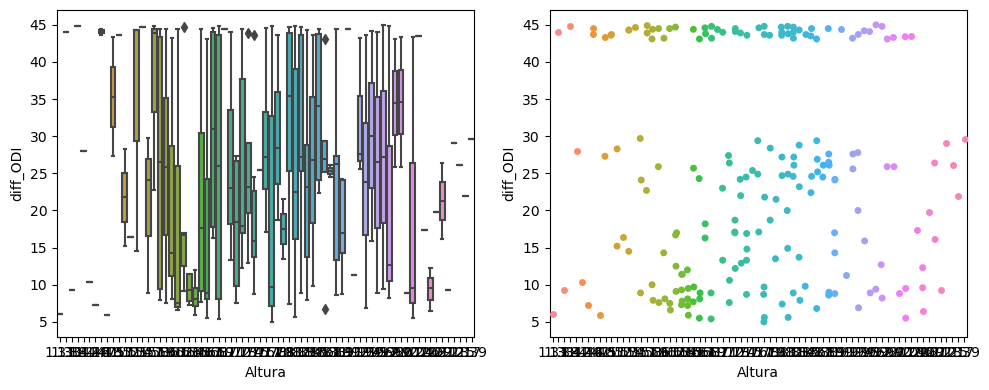

In [22]:
# According to the height:
fig,axs = plt.subplots (ncols=2, figsize=(10,4))
sns.boxplot(data=data, y="diff_ODI", x="Altura", ax=axs[0])
sns.stripplot(y="diff_ODI", data=data,x="Altura", ax=axs[1])
fig.tight_layout()
plt.show()

**We don't see a clear difference in the diff_ODI accoring to the sex, age, weight or height. So, we decide to do a inferential analysis**

# Inferential Analysis:

## Normality Analysis (graphical distribution)

First of all we need to check the normal distribution of the samples to know which kind of analysis apply. In this case we are going to do it from a graphical point of view. It is important to remark that this code is specific to two independent groups, should be modify in the case of dependent groups:

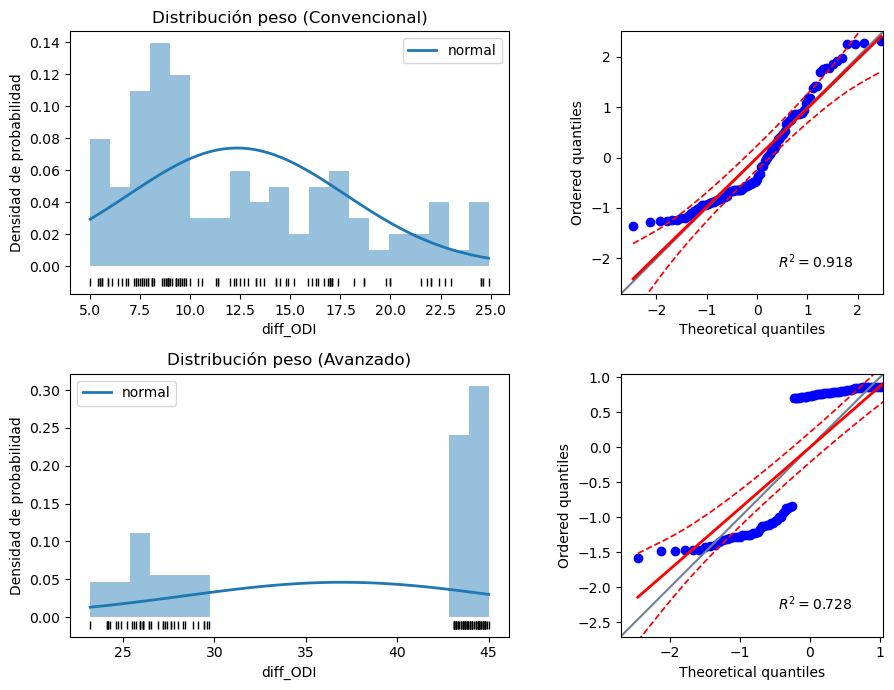

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

peso_conv = data.loc[data.Grupos == 'Convencional', 'diff_ODI']
mu, sigma = stats.norm.fit(peso_conv)

x_hat = np.linspace(min(peso_conv), max(peso_conv), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=peso_conv, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(peso_conv, np.full_like(peso_conv, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución peso (Convencional)')
axs[0, 0].set_xlabel('diff_ODI')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

pg.qqplot(peso_conv, dist='norm',ax=axs[0, 1])

peso_avan = data.loc[data.Grupos == 'Avanzado', 'diff_ODI']
mu, sigma = stats.norm.fit(peso_avan)
x_hat = np.linspace(min(peso_avan), max(peso_avan), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=peso_avan, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(peso_avan, np.full_like(peso_avan, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución peso (Avanzado)')
axs[1, 0].set_xlabel('diff_ODI')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(peso_avan, dist='norm', ax=axs[1, 1])
plt.tight_layout();


## Normality test of Shapiro-Wilk:

In [28]:
# To independent cases (our case)
pg.normality(data=data, dv='diff_ODI', group='Grupo')

,W,pval,normal
Grupo,,,
0,0.911064,4.421345e-06,False
1,0.718278,1.723134e-12,False


**We see that the quantile-quantile plots show left skewness in the case of the conventional distribution and distribution at the extremes for the advanced distribution. Furthermore, the Shapiro-Wilk test demonstrates that the data do not come from normally distributed populations. However, since the size of each group is greater than 30 observations, it can be considered that the t-test is still sufficiently robust.**

## Equality of variance (homoscedasticity).
Since the normality criterion is not met, we will use the Leven test:

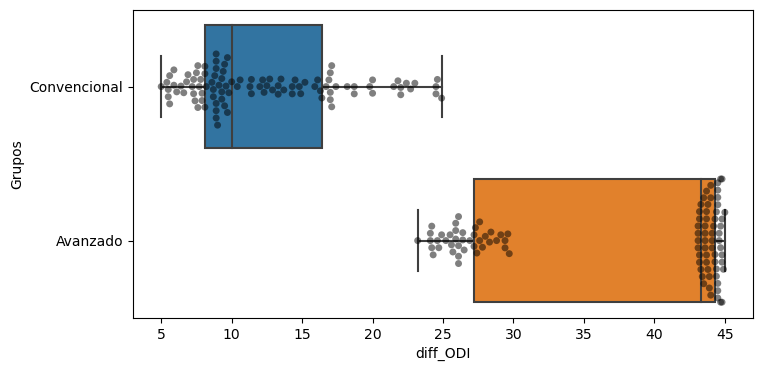

In [29]:
# Graphic:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Grupos", x="diff_ODI", data=data, ax=ax)
sns.swarmplot(y="Grupos", x="diff_ODI", data=data, color='black', alpha = 0.5, ax=ax);

In [30]:
# Homoscedasticity test:
pg.homoscedasticity(data=data, dv='diff_ODI', group='Grupos')

,W,pval,equal_var
levene,10.103811,0.001717,False


**Significant evidence is found that the variations are different between both populations. Let's perform the t-test:**

In [31]:
diff_ODI_convencional = data.loc[data.Grupos == 'Convencional', 'diff_ODI']
diff_ODI_avanzado = data.loc[data.Grupos == 'Avanzado', 'diff_ODI']

pg.ttest(x=diff_ODI_convencional, y=diff_ODI_avanzado, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-24.040959,198,two-sided,1.234869e-60,"[-26.65, -22.61]",3.400075,7.011e+56,1.0


# Conclusion:

Research hypothesis (H1): there are significant differences in the degree of improvement when using advanced treatment. 

Null hypothesis (H0): there are no significant differences in the degree of improvement between using advanced or conventional treatment. 

We see that the value shows a p-value significantly less than 0.05, so we can say that with 95% confidence we reject the null hypothesis, and therefore there are significant differences in the difference of the ODI factor depending on the treatment used.**